# Chapter 6 : Advanced Probability

## Example – Titanic

A very famous dataset involves looking at the survivors of the sinking of the Titanic in 1912. We will use an application of probability in order to figure out if there were any demographic features that showed a relationship to passenger survival. Mainly, we are curious to see if we can isolate any features of our dataset that can tell us more about the types of people who were likely to survive this disaster.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic['Survived'] = np.where(titanic['Survived']==1, 'yes', 'no')
titanic = titanic[['Sex', 'Survived']]

In [7]:
titanic.head()

,Sex,Survived
0,male,no
1,female,yes
2,female,yes
3,female,yes
4,male,no


In [9]:
titanic.shape[0]

891

In [12]:
# probaility of male and female
# P(A) = Frequency of A / Sample space
# P(A) = Number of times event A occurs / total number of events

num_rows = titanic.shape[0]
p_male = (titanic.Sex=="male").sum() / num_rows     
p_female = 1 - p_male 

print(p_male)
print(p_female)

0.6475869809203143
0.3524130190796857


In [13]:
# probabilty of survived and not survived
p_survived = (titanic.Survived=="yes").sum() / num_rows 
p_notsurvived = 1 - p_survived

print(p_survived)
print(p_notsurvived)

0.3838383838383838
0.6161616161616161


In [14]:
# Probabiltiy of survived given women
# P(Survived|Female)
number_of_women = titanic[titanic.Sex=='female'].shape[0]
women_who_lived = titanic[(titanic.Sex=='female') & (titanic.Survived=='yes')].shape[0]
p_survived_given_woman = women_who_lived / float(number_of_women) #frequentiest
p_survived_given_woman

0.7420382165605095

In [9]:
# did having a certain gender affect the survival rate? 
# P(Female|Survived) =  P(Female) * P(Survived|Female) / P(Survived)
# P(Male|Survived) = 1 -  P(Female|Survived)

# P(Female|Survived)
number_of_survivors = titanic[titanic.Survived=='yes'].shape[0]
women_who_lived = titanic[(titanic.Sex=='female') & (titanic.Survived=='yes')].shape[0]
p_woman_given_survived = women_who_lived / float(number_of_survivors)
p_woman_given_survived

0.6812865497076024

In [15]:
# did having a certain gender affect the survival rate? 
# P(Female|Survived) =  P(Female) * P(Survived|Female) / P(Survived)
# P(Male|Survived) = 1 -  P(Female|Survived)

# P(Female|Survived)
p_woman_given_survived = p_female * p_survived_given_woman / p_survived
p_woman_given_survived

0.6812865497076022

## Random Variables

## Discrete random variables

A discrete random variable only takes on a countable number of possible values. For example, 

X = the outcome of a dice roll

<table border='1'>
<tr>
    <td>Value</td>
    <td>X=1</td>
    <td>X=2</td>
    <td>X=3</td>
    <td>X=4</td>
    <td>X=5</td>
    <td>X=6</td>
</tr>

<tr>
    <td>Probability</td>
    <td>1/6</td>
    <td>1/6</td>
    <td>1/6</td>
    <td>1/6</td>
    <td>1/6</td>
    <td>1/6</td>
</tr>
</table>

Random variables have many properties, two of which are their <b>expected value and the variance</b>.
We will use a <b>probability mass function (PMF)</b> to describe a discrete random variable.

They take on the appearance of the following:
P(X = x) = PMF
So, for a dice roll, P(X = 1) = 1/6 and P(X = 5) = 1/6.
<br>
<i>
The expected value of a random variable defines the mean value of a long run of repeated samples of the random variable. This is sometimes called the mean of the variable. </i>

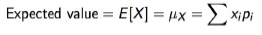

where xi is the ith outcome and pi is the ith probability.

So, for our dice roll, we can find the exact expected value as being as follows:
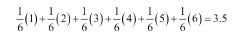

<br>
<i> The variance of a random variable represents the spread of the variable. It quantifies the variability of the expected value. </i>
The formula for the variance of a discrete random variable is expressed as follows:

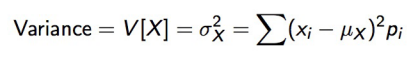

where xi and pi represent the same values as before and Mx represents the expected value of the variable.

In [11]:
import random

print(random.randint(3, 9))

6


In [14]:
# function to invoke a random variable and come out with a response.
import random

def random_variable_of_dice_roll():
    return random.randint(1, 6)
    

In [18]:
# Let's roll 100 dice and average the result
trials = []
num_trials = 100
for trial in range(num_trials):
    trials.append( random_variable_of_dice_roll() )
print (sum(trials)/(num_trials))

3.38


Text(0, 0.5, 'Average')

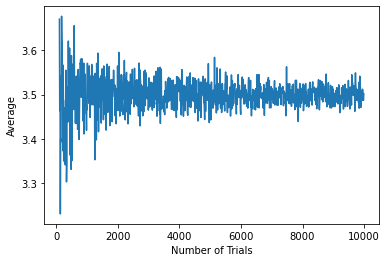

In [20]:
#Let's try this with a wide variety of trial numbers,
num_trials = range(100, 10000, 10)
avgs = []
for num_trial in num_trials:
    trials = []
    for trial in range(1,num_trial):
        trials.append( random_variable_of_dice_roll() )
    avgs.append(sum(trials)/float(num_trial))

plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel("Average")

## Continuous random variables

A continuous random variable can take on an infinite number of possible values, not just a few countable ones. We call the functions that describe the <b> distribution density curves </b> instead of probability mass functions.

Consider the following examples of continuous variables:
• The length of a sales representative's phone call (not the number of calls)
• The actual amount of oil in a drum marked 20 gallons (not the number of oil drums)

If X is a continuous random variable, then there is a function, f(x), such that for any constants a and b:
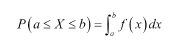

The preceding f(x) function is known as the <b> probability density function (PDF) </b>.
The PDF is the continuous random variable version of the PMF for discrete random variables.

The most important continuous distribution is the standard normal distribution.
You have, no doubt, either heard of the normal distribution or dealt with it. The idea behind it is quite simple. The PDF of this distribution is as follows:

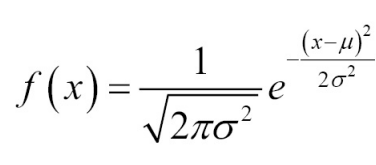

Here, is the mean of the variable and is the standard deviation. This might look
confusing, but let's graph it in Python with a mean of 0 and a standard deviation of 1, as shown here:

In [22]:
def normal_pdf(x, mu = 0, sigma = 1):
    return (1./np.sqrt(2*3.14 * sigma**2)) * 2.718**(-(x-mu)**2 / (2. * sigma**2))

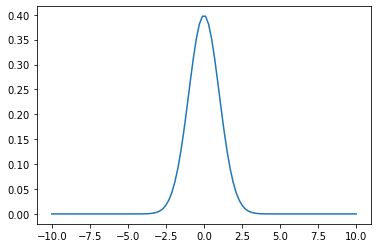

In [23]:
x_values = np.linspace(-10,10,100)
y_values = [normal_pdf(x) for x in x_values]
plt.plot(x_values, y_values)

Note that the graph is symmetrical around the x = 0 line.

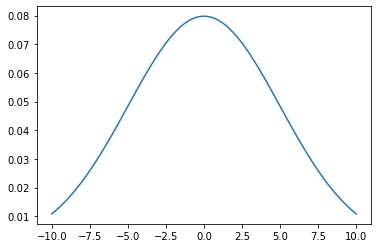

In [28]:
#Let's try sigma=5
x_values = np.linspace(-10,10,100)
y_values = [normal_pdf(x, sigma = 5) for x in x_values]
plt.plot(x_values, y_values)

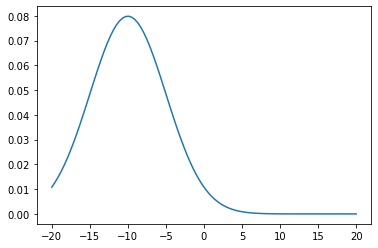

In [27]:
#Let's try mu=-5
x_values = np.linspace(-20,20,100)
y_values = [normal_pdf(x, mu = -10, sigma = 5) for x in x_values]
plt.plot(x_values, y_values)

In all the graphs, we have the standard bell shape that we are all familiar with, but as we change our parameters, we see that the bell might get skinnier, thicker, or move from left to right.